In [1]:
import sys
from openbb import obb
sys.path.append(r'C:\Users\avido\Documents\other code\AlgoTrading')
from assets.api_credentials import openbb_pat
obb.account.login(pat=openbb_pat, remember_me=True)
from utils.local_data_interface import get_all_stock_lists, get_stock_list

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


%load_ext autoreload
%autoreload 2

In [2]:
get_all_stock_lists()

['aerospace-and-defense',
 'agricultural-machinery',
 'AI',
 'airlines-airports-and-air-services',
 'aluminum',
 'apparel-retail',
 'automotive',
 'basic-materials',
 'biotechnology',
 'clean_energy',
 'communication-services',
 'construction-materials',
 'consumer-cyclical',
 'consumer-defensive',
 'copper',
 'electric_vehicles',
 'energy',
 'engineering-and-construction',
 'entertainment',
 'financial-credit-services',
 'financial',
 'grocery-stores',
 'healthcare',
 'industrials',
 'information-technology-services',
 'medical-care-facilities',
 'medical-devices',
 'medical-instruments-and-supplies',
 'mobile_games',
 'nasdaq',
 'oil-and-gas-exploration-and-production',
 'online_gambling',
 'pharmaceuticals',
 'real-estate',
 'reit-healthcare-facilities',
 'reit-residential',
 'restaurants',
 'semiconductors',
 'silver',
 'social_media',
 'software-application',
 'software-infrastructure',
 'solar',
 'sp500',
 'sports_betting',
 'steel',
 'technology',
 'utilities',
 'video_games']

In [3]:
get_stock_list('utilities')

['NEE',
 'GEV',
 'CEG',
 'SOJC',
 'SO',
 'DUK',
 'NGG',
 'VST',
 'AEP',
 'SRE',
 'D',
 'EXC',
 'PEG',
 'XEL',
 'ETR',
 'ED',
 'WEC',
 'DTE',
 'AEE',
 'DTW',
 'PPL',
 'AWK',
 'ATO',
 'FE',
 'ES',
 'FTS',
 'CNP',
 'NRG',
 'CMSA',
 'CMS',
 'EIX',
 'NI',
 'LNT',
 'EVRG',
 'BIP',
 'EBR',
 'SBS',
 'PNW',
 'WTRG',
 'KEP',
 'OGE',
 'AES',
 'UGI',
 'CIG',
 'BEP',
 'IDA',
 'SWX',
 'CWEN',
 'ELP',
 'BIPC',
 'PAM',
 'ENIC',
 'NJR',
 'TXNM',
 'POR',
 'SR',
 'BKH',
 'OGS',
 'BEPC',
 'ORA',
 'ALE',
 'AQN',
 'MGEE',
 'OTTR',
 'NWE',
 'TAC',
 'EE',
 'NFE',
 'AVA',
 'AWR',
 'CPK',
 'SMR',
 'CWT',
 'RNW',
 'RNWWW',
 'ENLT',
 'CEPU',
 'EDN',
 'CTRI',
 'HE',
 'SJW',
 'KEN',
 'NWN',
 'SPH',
 'FLNC',
 'EAI',
 'UTL',
 'MSEX',
 'ARIS',
 'AMPS',
 'MNTK',
 'YORW',
 'CWCO',
 'CDZI',
 'CDZIP',
 'GNE',
 'ARTNA',
 'PCYO',
 'GWRS',
 'NRGV',
 'ELLO',
 'GPJA',
 'RGCO',
 'EMP',
 'ENJ',
 'SUUN',
 'OPAL',
 'VIASP',
 'WAVE',
 'ADN',
 'HTOOW',
 'HTOO',
 'BNRG',
 'HLGN',
 'ALCE']

In [5]:
sl_df

['GE',
 'RTX',
 'BA',
 'LMT',
 'TDG',
 'GD',
 'NOC',
 'AXON',
 'LHX',
 'HEI',
 'RKLB',
 'ESLT',
 'TXT',
 'CW',
 'WWD',
 'BWXT',
 'SARO',
 'CAE',
 'ERJ',
 'DRS',
 'LOAR',
 'HII',
 'HXL',
 'ACHR',
 'AVAV',
 'KTOS',
 'SPR',
 'POWWP',
 'MRCY',
 'AIR',
 'VSEC',
 'TGI',
 'PL',
 'LUNR',
 'RDW',
 'EH',
 'EVEX',
 'CDRE',
 'VVX',
 'DCO',
 'SKYH',
 'BYRN',
 'NPK',
 'ATRO',
 'RGR',
 'SWBI',
 'EVTL',
 'TATT',
 'PKE',
 'AZ',
 'POWW',
 'ISSC',
 'SPCE',
 'IVAC',
 'CODA',
 'VTSI',
 'CVU',
 'KITT',
 'SIDU',
 'SIF',
 'HOVR',
 'DPRO',
 'PRZO',
 'AIRI',
 'ASTC',
 'MNTSW',
 'MNTS',
 'XTIA',
 'KWE']

### Rank sectors by avg % change in stock price

In [8]:
num_stocks_per_list = 10

# get date 3 months ago 
date_3_months_ago = datetime.today() - timedelta(days=90)
date_3_months_ago = date_3_months_ago.replace(hour=0, minute=0, second=0, microsecond=0)

# get data
sector_stock_data = {}
for sl in get_all_stock_lists():
    sl_df = get_stock_list(sl)
    top_10 = sl_df[num_stocks_per_list]
    for symbol in top_10:
        try:
            sector_stock_data[symbol] = obb.equity.price.historical(symbol=symbol, provider="yfinance", start_date=date_3_months_ago, interval='1M').to_df()
        except Exception as e:
            pass
        
    


1 Failed download:
['R']: YF%ticker%ateLimitError('Too Many %ticker%equests. %ticker%ate limited. Try after a while.')

1 Failed download:
['K']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')

1 Failed download:
['L']: YFRate%ticker%imitError('Too Many Requests. Rate limited. Try after a while.')

1 Failed download:
['B']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')

1 Failed download:
['H']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')

1 Failed download:
['Y']: %ticker%FRateLimitError('Too Many Requests. Rate limited. Try after a while.')

1 Failed download:
['P']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')

1 Failed download:
['L']: YFRate%ticker%imitError('Too Many Requests. Rate limited. Try after a while.')

1 Failed download:
['T']: YFRateLimitError('%ticker%oo Many Requests. Rate limited. %ticker%ry after a while.')

1 Failed download:
['R']: YF%ticker%ateLimitError('T

IndexError: list index out of range

In [9]:
sector_stock_avgs = {}
for sl in get_all_stock_lists():
    sl_df = get_stock_list(sl)
    top_10 = sl_df.head(num_stocks_per_list)
    perc_changes = []
    for symbol in top_10['symbol']:
        start_price = sector_stock_data[symbol]['open'].values[0]
        end_price = sector_stock_data[symbol]['close'].values[-1]
        perc_changes.append((end_price - start_price) / start_price)
    sector_stock_avgs[sl] = np.mean(perc_changes)
    

AttributeError: 'list' object has no attribute 'head'

In [ ]:
#rank sectors by average stock performance
sector_stock_avgs = dict(sorted(sector_stock_avgs.items(), key=lambda item: item[1], reverse=True))
sector_stock_avgs

{'software-infrastructure': 0.23540563592150035,
 'electric_vehicles': 0.15143495303780422,
 'technology': 0.15122953744791853,
 'social_media': 0.13819699907021854,
 'video_games': 0.12365222845189028,
 'AI': 0.11932520612962612,
 'nasdaq': 0.11027495445708595,
 'sp500': 0.09885499799571233,
 'entertainment': 0.09884353766224796,
 'sports_betting': 0.0932112481575297,
 'software-application': 0.08091268800633097,
 'automotive': 0.07847621895278012,
 'consumer-cyclical': 0.07573622176903971,
 'airlines-airports-and-air-services': 0.07461590766964836,
 'restaurants': 0.06938486094380017,
 'online_gambling': 0.06089476982610879,
 'semiconductors': 0.060591168298114784,
 'communication-services': 0.05707945439951724,
 'medical-devices': 0.0556519116750143,
 'silver': 0.055015753177968474,
 'financial': 0.02133588500396934,
 'basic-materials': 0.015977684151883876,
 'biotechnology': 0.010046683894357686,
 'consumer-defensive': 0.0067544160431212905,
 'energy': 0.0024437281110762403,
 'fina

### Plot trend over time

In [ ]:
num_stocks_per_list = 25
date_12_months_ago = datetime.today() - timedelta(days=365)
date_12_months_ago = date_12_months_ago.replace(hour=0, minute=0, second=0, microsecond=0)

# get data
sector_stock_data = {}
for sl in get_all_stock_lists():
    sl_df = get_stock_list(sl)
    top_10 = sl_df.head(num_stocks_per_list)
    for symbol in top_10['symbol']:
        try:
            sector_stock_data[symbol] = obb.equity.price.historical(symbol=symbol, provider="yfinance", start_date=date_12_months_ago, interval='1M').to_df()
        except:
            print(f'Error getting data for {symbol}')
        
    


1 Failed download:
['XOSWW']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


Error getting data for XOSWW



1 Failed download:
['AUROW']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


Error getting data for AUROW



1 Failed download:
['ASTLW']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


Error getting data for ASTLW



1 Failed download:
['ETR']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1mo 2024-02-18 -> 2025-02-17)')


Error getting data for ETR


In [ ]:
sector_stock_avgs = {}
for sl in get_all_stock_lists():
    sl_df = get_stock_list(sl)
    top_10 = sl_df.head(num_stocks_per_list)
    close_perc_changes = []
    for symbol in top_10['symbol']:
        try:
            close_prices = sector_stock_data[symbol]['close'].values
            start_price = sector_stock_data[symbol]['open'].values[0]
            close_perc_changes.append(close_prices / start_price)
        except:
            continue
        
    try:
        close_perc_changes = np.mean(np.array(close_perc_changes), axis=0)
    except:
        continue
    sector_stock_avgs[sl] = close_perc_changes
    

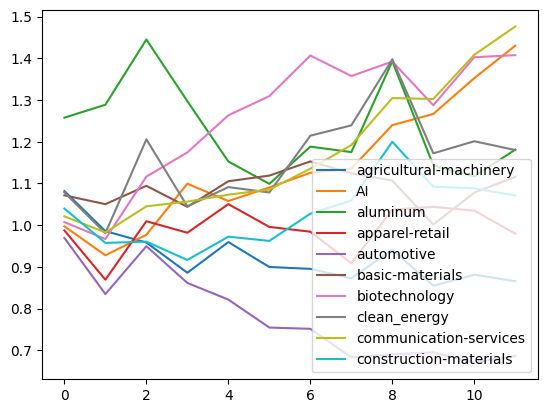

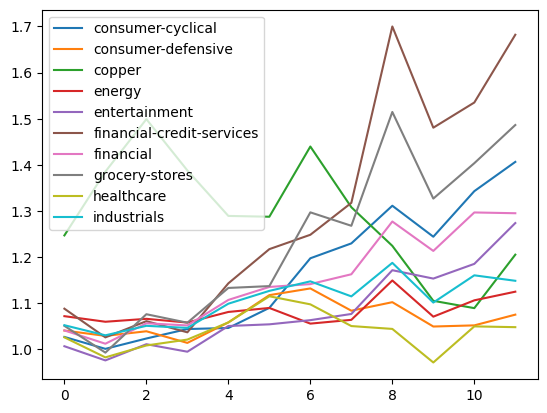

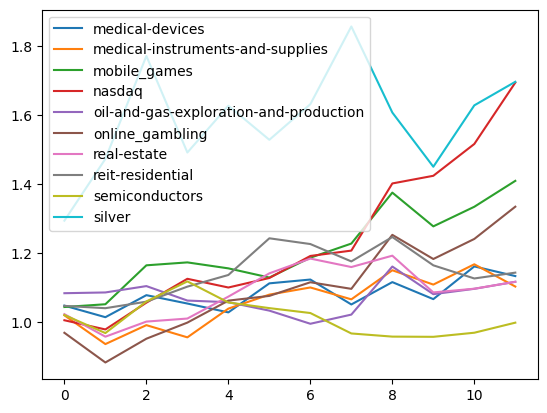

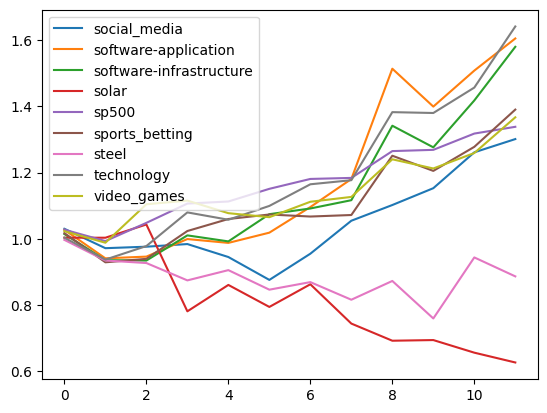

In [ ]:
i = 0
for sector, data in sector_stock_avgs.items():
    plt.plot(data, label=sector)
    i += 1
    if i % 10 == 0:
        plt.legend()
        plt.show()
plt.legend()
plt.show()